In [304]:
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import os
import shutil

-30


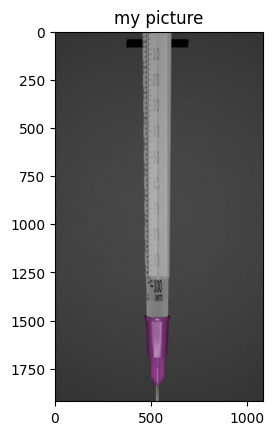

In [302]:
img = cv2.imread("dataset/0001.jpg")

def channel_shift(img, value):
    if random.randint(0,1):
        value = int(random.uniform(value/2, value))
    else:
        value = int(random.uniform(-value/2, -value))
    # print(value)
    img = img + value
    return np.clip(img,0,255).astype(np.uint8)

def change_h_of_hue(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Split the image into the hue, saturation, and value channels
    h, s, v = cv2.split(hsv)

    # Generate a random value for the hue channel
    rand_h = random.uniform(0, 360)

    # Add the random value to the hue channel
    h = (h + rand_h).astype(np.uint8)

    # Concatenate the hue, saturation and value channels
    hsv = cv2.merge((h, s, v))

    # Convert the image back to the BGR color space
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

def fill(img, h, w):
    return cv2.resize(img, (h, w), cv2.INTER_CUBIC)

def zoom_and_rotate(img, zoom_ratio=(1,2), rotate_ratio=(0,0)):
    zoom_ratio = random.uniform(*zoom_ratio)
    rotate_ratio = random.uniform(*rotate_ratio)
    height, width = img.shape[:2]
    # print(height,width)
    # Define the center of the image
    center = (width//2, height//2)

    # Create the transformation matrix
    matrix = cv2.getRotationMatrix2D(center, rotate_ratio, zoom_ratio)

    # Apply the zoom to the image
    zoomed_img = cv2.warpAffine(img, matrix, (width, height))

    # Apply the zoom to the image
    return zoomed_img

img = change_h_of_hue(img)
img = channel_shift(img, 50)
img = zoom_and_rotate(img,(1,1.75))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('my picture')
plt.show()


In [ ]:
for file in os.listdir('./dataset/'):
    path = f"./dataset/{file}"
    for i in range(3):
        img = cv2.imread(path)
        img = change_h_of_hue(img)
        img = channel_shift(img, 50)
        img = zoom_and_rotate(img,(1,1.75))
        cv2.imwrite(path.replace("v0",f"v{i+1}"), img)
        